In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [91]:
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv',header=None)

In [92]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [93]:
header =['id','RI','SODIUM','MG','AL','SI','POT','CA','Ba','iron','type']


data.columns = header

In [94]:
data


,id,RI,SODIUM,MG,AL,SI,POT,CA,Ba,iron,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [95]:
data.describe()

,id,RI,SODIUM,MG,AL,SI,POT,CA,Ba,iron,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
#id column is just like a index so ignore
#value count is full no null values
#RI data is looking ok as std is low value difference bw all quantiles are under range
#sodium data is looking ok as std is low value difference bw all quantiles are under range
#MG difference between mean and std is low needs to be check and minimum value is zero
#AL is having big gap between 75% and maximum
#SI mean is near about equal to 50%
#pottasium is having o minimum value and gap between 75% and maximum is quite very high
#calcium have high std 
#barium is having 0 values in 0%,25%,50% and 75%
#iron is also having zero values and std is higher than mean

In [96]:
data.nunique()

id        214
RI        178
SODIUM    142
MG         94
AL        118
SI        133
POT        65
CA        143
Ba         34
iron       32
type        6
dtype: int64

In [ ]:
#there are 6 type of target in type column
#mostly all columns have good amount of unique values

In [97]:
data.isnull().sum()

id        0
RI        0
SODIUM    0
MG        0
AL        0
SI        0
POT       0
CA        0
Ba        0
iron      0
type      0
dtype: int64

In [ ]:
#there is no null values in dataset

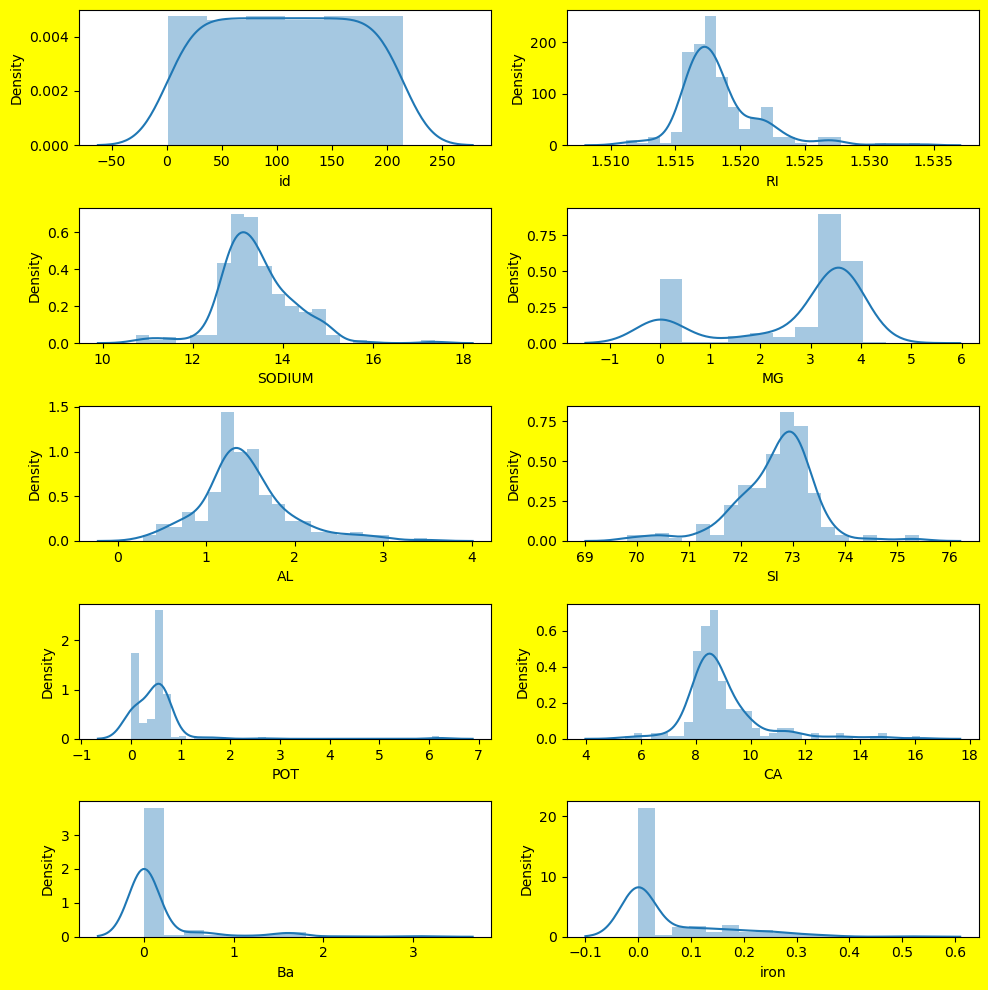

In [98]:
plt.figure(figsize=(10,10),facecolor='yellow')
p=1
for column in data:
    if p<=10:
        ax=plt.subplot(5,2,p)
        sns.distplot(data[column])
        xlabel=(data[column])
        
        p+=1
plt.tight_layout()    

In [ ]:
#data distribution is not good.
#data is having high number of outliers or lot of skewness as figure represents

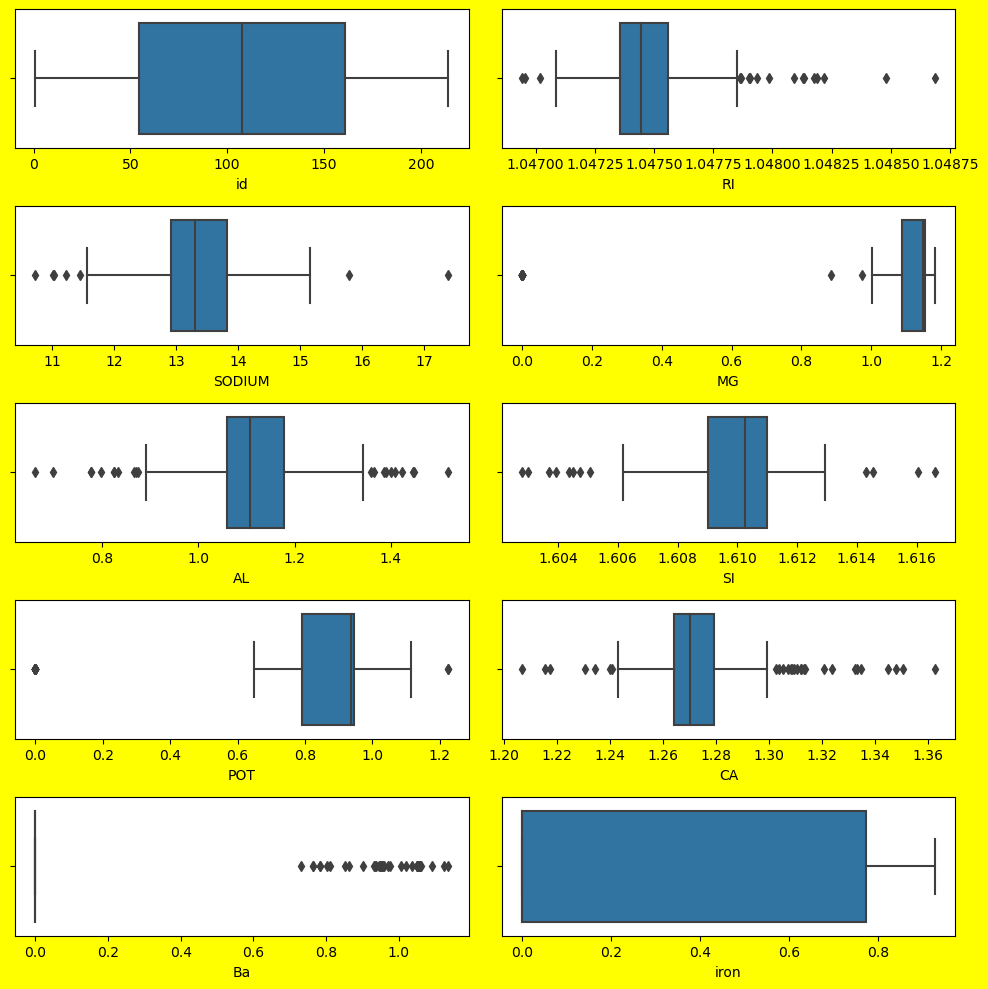

In [302]:
plt.figure(figsize=(10,10),facecolor='yellow')
p=1
for column in data:
    if p<=10:
        ax=plt.subplot(5,2,p)
        sns.boxplot(data[column])
        xlabel=(data[column])
        
        p+=1
plt.tight_layout()   

In [100]:
from scipy.stats import zscore
feature=data[['id', 'RI', 'SODIUM', 'MG', 'AL', 'SI', 'POT', 'CA', 'Ba', 'iron']]
z=np.abs(zscore(feature))
z

,id,RI,SODIUM,MG,AL,SI,POT,CA,Ba,iron
0,1.723976,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451
1,1.707788,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451
2,1.691601,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451
3,1.675413,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451
4,1.659226,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451
...,...,...,...,...,...,...,...,...,...,...
209,1.659226,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451
210,1.675413,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451
211,1.691601,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451
212,1.707788,0.612399,1.193270,1.865511,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451


In [ ]:
#1st i want to try quantile method but about half of data will be remove with this technique so decide to go with zscore.

In [99]:
data.columns

Index(['id', 'RI', 'SODIUM', 'MG', 'AL', 'SI', 'POT', 'CA', 'Ba', 'iron',
       'type'],
      dtype='object')

In [104]:
np.where(z>3)

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213], dtype=int64),
 array([7, 1, 2, 5, 7, 8, 1, 5, 7, 7, 7, 1, 7, 7, 9, 9, 4, 5, 8, 4, 6, 4,
        6, 9, 2, 5, 5, 8, 5, 6, 8, 8, 8], dtype=int64))

In [ ]:
#taking 3 as standard thershold value and remove above 3 values and making new column whose values are below 3.

In [108]:
df=data[(z<3).all(axis=1)]

df.shape

(194, 11)

In [ ]:
#20 rows are removed which is quite ok.

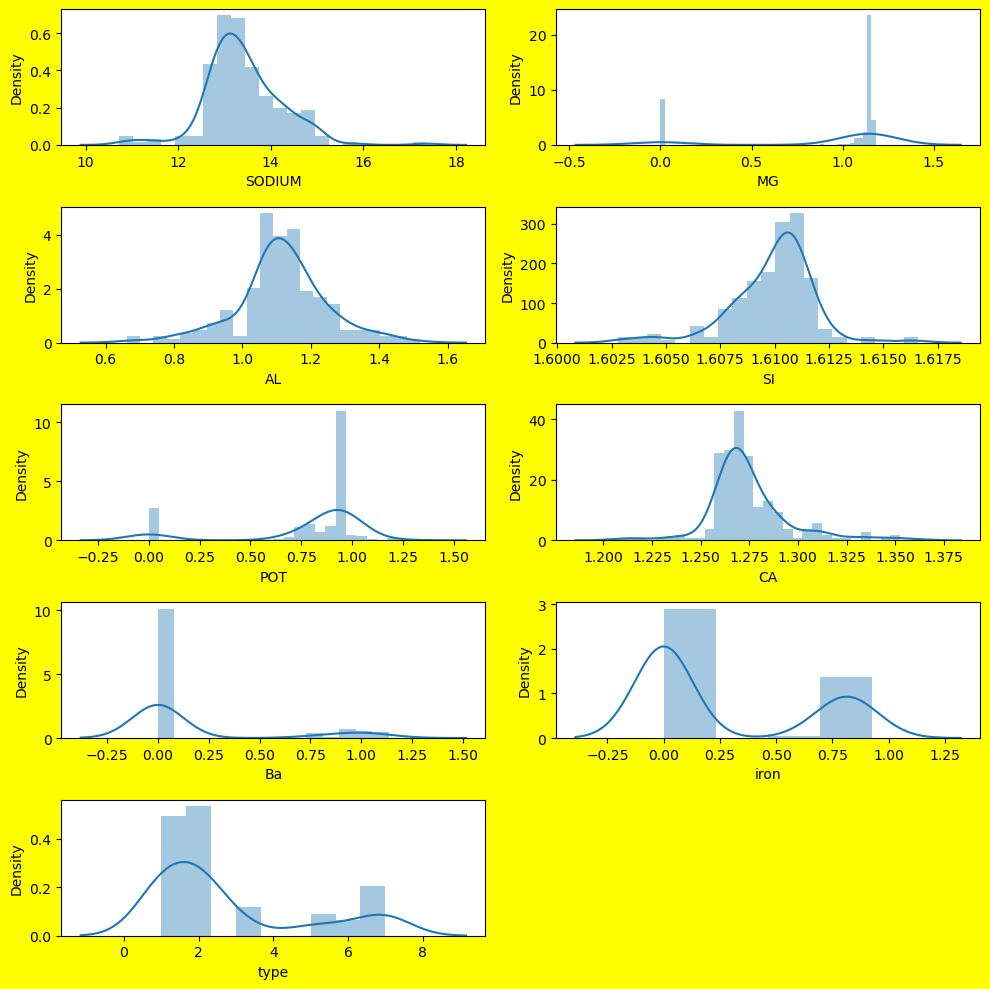

In [275]:
plt.figure(figsize=(10,10),facecolor='yellow')
p=1
for column in df:
    if p<=10:
        ax=plt.subplot(5,2,p)
        sns.distplot(df[column])
        xlabel=(df[column])
        
        p+=1
plt.tight_layout()    

In [ ]:
#shape is not well distributed as expected.
#Checking skewness if it helps. 

In [110]:
data.skew()

id        0.000000
RI        1.625431
SODIUM    0.454181
MG       -1.152559
AL        0.907290
SI       -0.730447
POT       6.551648
CA        2.047054
Ba        3.416425
iron      1.754327
type      1.114915
dtype: float64

In [ ]:
#data is highly skewed 
#both positve and negative
#only sodium is in acceptable range
#using cbrt to remove skewness

In [111]:
data['RI'] = np.cbrt(data['RI'] )
data['MG'] = np.cbrt(data['MG'])
data['AL'] = np.cbrt(data['AL'])
data['SI'] = np.cbrt(data['SI'])
data['POT'] = np.cbrt(data['POT'])
data['CA'] = np.cbrt(data['CA'])
data['Ba'] = np.cbrt(data['Ba'])
data['iron'] = np.cbrt(data['iron'])

In [112]:
data.skew()

id        0.000000
RI        1.617049
SODIUM    0.454181
MG       -1.440196
AL       -0.204132
SI       -0.776908
POT      -0.591896
CA        1.407358
Ba        2.073007
iron      0.894683
type      1.114915
dtype: float64

In [ ]:
#data still is skewed again aplying same

In [113]:
data['RI'] = np.cbrt(data['RI'] )
data['MG'] = np.cbrt(data['MG'])

data['SI'] = np.cbrt(data['SI'])
data['POT'] = np.cbrt(data['POT'])
data['CA'] = np.cbrt(data['CA'])
data['Ba'] = np.cbrt(data['Ba'])
data['iron'] = np.cbrt(data['iron'])

In [114]:
data.skew()

id        0.000000
RI        1.614260
SODIUM    0.454181
MG       -1.523837
AL       -0.204132
SI       -0.792322
POT      -1.852385
CA        1.181876
Ba        1.756306
iron      0.762576
type      1.114915
dtype: float64

In [ ]:
#found that skewness is not decreasing much
#going with same data

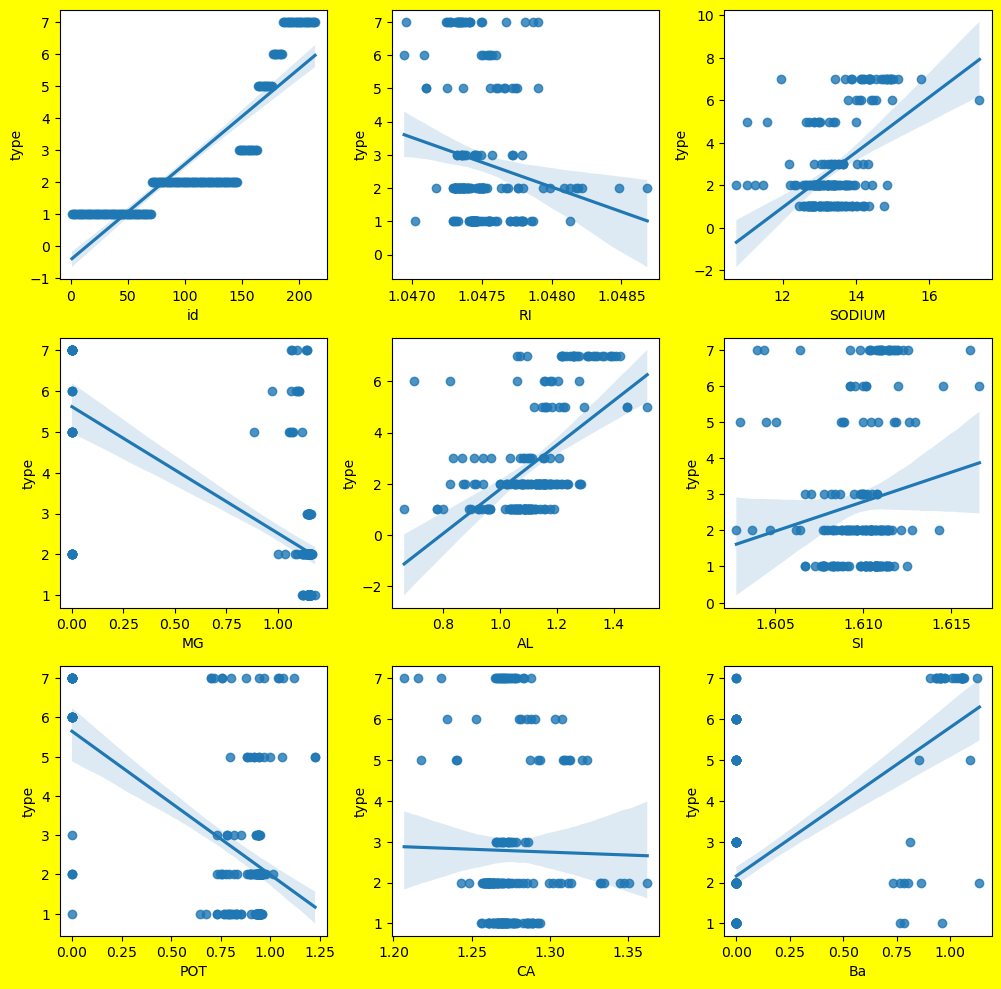

In [303]:
plt.figure(figsize=(10,10),facecolor='yellow')
p=1
for column in data:
    if p<=9:
        ax=plt.subplot(3,3,p)
        sns.regplot(x=data[column],y=data['type'])
        xlabel=(data[column])
        
        p+=1
plt.tight_layout()    
plt.show()

In [ ]:
#sodium,Ba,Al,Si is directly proportional to taget
#pot,mg,RI is found negatively co-related.
#CA is having appx neutral line.

In [ ]:
#checking multi co-linearity and finding which feature is having good relation with target

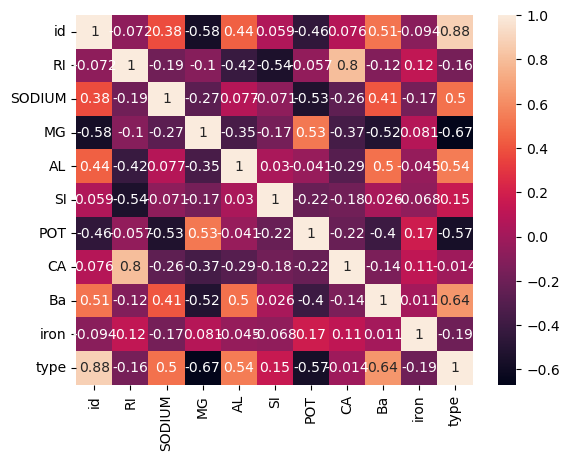

In [115]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
#sodium,Aluminium and Barium is having high relation with target.
#RI and Calcium is having high multi co-linearity
#dropping RI 

In [116]:
df=data.drop(['RI','id'],axis=1)

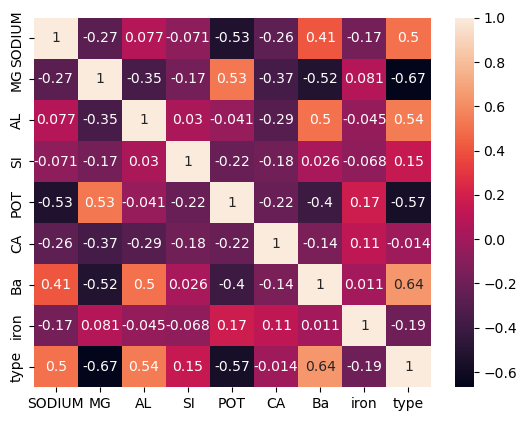

In [117]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [118]:
X=df.drop('type',axis=1)
y=df['type']

In [120]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

In [119]:
df['type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: type, dtype: int64

In [ ]:
#target is not balance feature 2 is having 76 number of occurance while type 6 is having 9 values.

In [276]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=200)

In [122]:
std=StandardScaler()

scld=std.fit_transform(X)

In [123]:
from imblearn.over_sampling import SMOTE

In [277]:
smote=SMOTE(k_neighbors=2,random_state=155,n_jobs=-1)

x_train_s,y_train_s=smote.fit_resample(x_train,y_train)

In [ ]:
using smote to oversample samples

In [125]:
from collections import Counter

In [126]:
print(Counter(y_train))
print(Counter(y_train_s))

Counter({1: 57, 2: 52, 7: 20, 3: 13, 5: 11, 6: 7})
Counter({1: 57, 2: 57, 3: 57, 7: 57, 5: 57, 6: 57})


In [ ]:
#after using smote found these results and going with these

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [299]:
knn=KNeighborsClassifier()

In [300]:
knn.fit(x_train_s,y_train_s)

KNeighborsClassifier()

In [185]:
from sklearn.metrics import accuracy_score,classification_report
def table(dt,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=dt.predict(x_train)
        print("\n-------------train result------------")
        print(f'Acuraccy Score:{accuracy_score(y_train,y_pred)}')
    elif train==False:
        pred=dt.predict(x_test)
        print("\n-------------test result------------")
        print(f'Acuraccy Score:{accuracy_score(y_test,pred)}')
    
        print("\n\n Test classification Report \n",classification_report(y_test,pred))

In [301]:
table(knn,x_train_s,x_test,y_train_s,y_test, train=True)
table(knn,x_train_s,x_test,y_train_s,y_test, train=False)


-------------train result------------
Acuraccy Score:0.8362573099415205

-------------test result------------
Acuraccy Score:0.4444444444444444


 Test classification Report 
               precision    recall  f1-score   support

           1       0.39      0.69      0.50        13
           2       0.67      0.17      0.27        24
           3       0.20      0.25      0.22         4
           5       0.12      0.50      0.20         2
           6       0.50      0.50      0.50         2
           7       0.80      0.89      0.84         9

    accuracy                           0.44        54
   macro avg       0.45      0.50      0.42        54
weighted avg       0.56      0.44      0.42        54



In [ ]:
#when random seed is 200 and test size=0.25 accurcy is 44%.

In [ ]:
#checking cross validation score 

In [226]:
from sklearn.model_selection import cross_val_score,GridSearchCV

In [280]:
cross_val_score(knn,X,y,cv=5).mean()

0.5462901439645627

In [281]:
cross_val_score(knn,X,y,cv=5)

array([0.58139535, 0.62790698, 0.53488372, 0.53488372, 0.45238095])

In [ ]:
#tunning parameters for good results using GridSearchCV

In [282]:
grids={'algorithm':['kd_tree','brute'],
      'leaf_size':[2,3,4,5,6],
      'n_neighbors':[2,4,6,7,8,9,10,11,12,13,14,15]}

In [283]:
gridcv=GridSearchCV(knn,param_grid=grids)

In [284]:
gridcv.fit(x_train_s,y_train_s)

GridSearchCV(estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=2,
                                            n_neighbors=2),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [2, 3, 4, 5, 6],
                         'n_neighbors': [2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                         15]})

In [285]:
gridcv.best_score_

0.7338874680306906

In [286]:
gridcv.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=2, n_neighbors=2)

In [287]:
knn=KNeighborsClassifier(algorithm='kd_tree', leaf_size=2, n_neighbors=2)

In [288]:
knn.fit(x_train_s,y_train_s)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=2, n_neighbors=2)

In [289]:
table(knn,x_train_s,x_test,y_train_s,y_test, train=True)
table(knn,x_train_s,x_test,y_train_s,y_test, train=False)


-------------train result------------
Acuraccy Score:0.9210526315789473

-------------test result------------
Acuraccy Score:0.5740740740740741


 Test classification Report 
               precision    recall  f1-score   support

           1       0.41      0.92      0.57        13
           2       0.78      0.29      0.42        24
           3       0.33      0.25      0.29         4
           5       0.50      0.50      0.50         2
           6       0.67      1.00      0.80         2
           7       1.00      0.89      0.94         9

    accuracy                           0.57        54
   macro avg       0.62      0.64      0.59        54
weighted avg       0.68      0.57      0.55        54



In [162]:
##when n_neighbors is 15 accuracy is 50%
#after tunning best accuracy found is 57%


In [ ]:
#2nd model is decisionTree 

In [242]:
from sklearn.tree import DecisionTreeClassifier

In [243]:
dt=DecisionTreeClassifier()

In [290]:
dt.fit(x_train_s,y_train_s)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=6)

In [291]:
table(dt,x_train_s,x_test,y_train_s,y_test, train=True)
table(dt,x_train_s,x_test,y_train_s,y_test, train=False)


-------------train result------------
Acuraccy Score:0.7426900584795322

-------------test result------------
Acuraccy Score:0.48148148148148145


 Test classification Report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.77      0.42      0.54        24
           3       0.16      1.00      0.28         4
           5       0.33      1.00      0.50         2
           6       1.00      1.00      1.00         2
           7       1.00      0.89      0.94         9

    accuracy                           0.48        54
   macro avg       0.54      0.72      0.54        54
weighted avg       0.57      0.48      0.47        54



In [292]:
dt_grid={'criterion':['ginni','entropy'],
        'min_samples_leaf':range(1,8),
        'max_depth':range(5,15),
        'min_samples_split':range(2,10),
        'max_leaf_nodes':range(2,10)}

In [293]:
dt_grid=GridSearchCV(dt,param_grid=dt_grid,cv=8,n_jobs=-1)

In [294]:
dt_grid.fit(x_train_s,y_train_s)

GridSearchCV(cv=8,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              max_leaf_nodes=6),
             n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(5, 15),
                         'max_leaf_nodes': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10)})

In [295]:
dt_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_leaf_nodes': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [296]:
adt=DecisionTreeClassifier(criterion='entropy',
 max_depth=5,
 max_leaf_nodes= 8,
 min_samples_leaf= 1,
 min_samples_split= 2)

In [297]:
adt.fit(x_train_s,y_train_s)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=8)

In [298]:
table(adt,x_train_s,x_test,y_train_s,y_test, train=True)
table(adt,x_train_s,x_test,y_train_s,y_test, train=False)


-------------train result------------
Acuraccy Score:0.8157894736842105

-------------test result------------
Acuraccy Score:0.5740740740740741


 Test classification Report 
               precision    recall  f1-score   support

           1       0.36      0.31      0.33        13
           2       0.68      0.54      0.60        24
           3       0.25      0.50      0.33         4
           5       0.33      1.00      0.50         2
           6       1.00      1.00      1.00         2
           7       1.00      0.89      0.94         9

    accuracy                           0.57        54
   macro avg       0.61      0.71      0.62        54
weighted avg       0.63      0.57      0.59        54



In [ ]:
Both models are getting appx same results

In [272]:
import pickle

In [274]:
pickle.dump(data,open('Glass_model','wb'))